# NO3 Plate Processing

### upload

In [587]:
#install.packages('tibble')

In [588]:
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [589]:
getwd()

[1] "/Users/brookesienkiewicz/Documents/LabNotebook/Nutrients"

In [590]:
# load plate raws 
test <- read_excel("plate_results/stnd_test2.xlsx")

New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


In [591]:
head(test)

Software Version,3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Experiment File Path:,C:\Users\Public\Documents\Experiments\sienkiewicz_winbourne\std_test.xpt,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Protocol File Path:,C:\Users\Public\Documents\Experiments\sienkiewicz_winbourne\nitrate_updated.prt,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Plate Number,Plate 3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Date,45721,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Time,0.75908564814814816,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [592]:
options(scipen = 999)
options(digits = 5)  

In [593]:
# pull out raw results 
raw <-test %>%
    select(2:14) %>%
        slice(c(42:57)) %>%
# get rid of scientific notation
            mutate(across(everything(), ~ as.numeric(.))) %>% 
                mutate(across(everything(), ~ round(., 4))) 
head(raw)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(everything(), ~as.numeric(.))`.
Caused by warning:
! NAs introduced by coercion”


3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
NA,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
NA,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
NA,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
NA,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
NA,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087


In [594]:
## data cleanup 
# fix colnames 
colnames(raw) <- raw[1, ]
colnames(raw)[1] <- "letter"
# remove first row 
raw <- raw[-1,]
# convert to df
raw <- as.data.frame(raw)
raw

letter,1,2,3,4,5,6,7,8,9,10,11,12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
NA,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
NA,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
NA,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
NA,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087
NA,0.010,0.007,0.005,0.006,0.006,0.008,0.781,0.054,0.002,0.000,-0.001,0.022
NA,0.080,0.071,0.072,0.068,0.066,0.067,0.478,0.064,0.064,0.064,0.064,0.098
NA,0.015,0.007,0.008,0.003,0.001,0.002,0.413,-0.001,-0.001,0.000,-0.001,0.033
NA,0.072,0.073,0.107,0.092,0.098,0.106,0.199,0.064,0.848,0.485,0.121,0.109


In [595]:
# rename rows with letter and letter_blank
n_rows <- nrow(raw)
letters_vec <- letters[1:((n_rows + 1) %/% 2)]
rownames(raw) <- paste0(rep(letters_vec, each = 2)[1:n_rows], 
                              c(rep(c("", "_blank"), length(letters_vec)), FALSE)[1:n_rows])
# remove first columns
raw <- raw[, -1]
raw

,1,2,3,4,5,6,7,8,9,10,11,12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
a_blank,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
b,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
b_blank,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
c,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087
c_blank,0.010,0.007,0.005,0.006,0.006,0.008,0.781,0.054,0.002,0.000,-0.001,0.022
d,0.080,0.071,0.072,0.068,0.066,0.067,0.478,0.064,0.064,0.064,0.064,0.098
d_blank,0.015,0.007,0.008,0.003,0.001,0.002,0.413,-0.001,-0.001,0.000,-0.001,0.033
e,0.072,0.073,0.107,0.092,0.098,0.106,0.199,0.064,0.848,0.485,0.121,0.109


## Standard Test - processing 
this standards test plate was run on 3/5/25
- for now, not worring about the 'blank' reading by the plate reader
- didn't use the last 2 rows
- 3x **low (0 - 0.05 ppm)**
- and 2x **normal standards (0 - 1 ppm)**
- 2 duplicate test samples 
- 3x 3 QC checks using ERA standard 

In [596]:
# calculate standard curve of low stnd using linear model 
# pull out plate setup 
plate_setup<-test %>%
 select(2:14) %>%
        slice(c(22:36)) 

plate_setup <- as.data.frame(plate_setup)
head(plate_setup)

,3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
2,NA,0,5.0000000000000001E-3,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,5.0000000000000001E-3
3,B,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
4,NA,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
5,C,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
6,NA,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02


### Low 

#### add data 

In [597]:
# rename rows
n_rows <- nrow(plate_setup)
letters_vec <- letters[1:((n_rows + 1) %/% 2)]
rownames(plate_setup) <- paste0(rep(letters_vec, each = 2)[1:n_rows], 
                              c(rep(c("", "_blank"), length(letters_vec)), FALSE)[1:n_rows])

#remove first col 
plate_setup <- plate_setup[, -1]
#rename cols 
colnames(plate_setup) <- as.character(1:12)

In [598]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
a_blank,0,5.0000000000000001E-3,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,5.0000000000000001E-3
b,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
b_blank,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
c,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
c_blank,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02
d,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:2,BLK,BLK,BLK,BLK,STD5
d_blank,NA,NA,NA,NA,NA,NA,0.5,NA,NA,NA,NA,0.03
e,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD6


In [599]:
# convert numbers to numeric and get rid of scientific notation
plate_setup[grepl("blank", rownames(plate_setup)), ] <- 
  lapply(plate_setup[grepl("blank", rownames(plate_setup)), ], function(x) round(as.numeric(x), 4))

In [600]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
a_blank,0,0.005,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,0.005
b,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
b_blank,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
c,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
c_blank,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02
d,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:2,BLK,BLK,BLK,BLK,STD5
d_blank,NA,NA,NA,NA,NA,NA,0.5,NA,NA,NA,NA,0.03
e,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD6


In [601]:
low <- data.frame(id = unlist(plate_setup[1, 1:7]),
                    conc = unlist(plate_setup[2, 1:7]),
                    od = unlist(raw[1, 1:7]),
                    od2 = unlist(raw['e', 1:7])
                 )
low

,id,conc,od,od2
,<chr>,<chr>,<dbl>,<dbl>
1,STD1,0,0.079,0.072
2,STD2,0.005,0.098,0.073
3,STD3,0.01,0.082,0.107
4,STD4,0.02,0.092,0.092
5,STD5,0.03,0.145,0.098
6,STD6,0.04,0.114,0.106
7,STD7,0.05,0.121,0.199


In [602]:
#blank as std 1 (for 3rd rep)
low$od3 <- raw['a', 8] 
# rest of stds from 3rd rep  
low[2:7,'od3'] <- raw[seq(from = 1, to = 11, by = 2), 12]
low

,id,conc,od,od2,od3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,STD1,0,0.079,0.072,0.066
2,STD2,0.005,0.098,0.073,0.079
3,STD3,0.01,0.082,0.107,0.077
4,STD4,0.02,0.092,0.092,0.087
5,STD5,0.03,0.145,0.098,0.098
6,STD6,0.04,0.114,0.106,0.109
7,STD7,0.05,0.121,0.199,0.171


In [603]:
# check character types (all need to be numeric to run model)
str(low)

'data.frame':	7 obs. of  5 variables:
 $ id  : chr  "STD1" "STD2" "STD3" "STD4" ...
 $ conc: chr  "0" "0.005" "0.01" "0.02" ...
 $ od  : num  0.079 0.098 0.082 0.092 0.145 0.114 0.121
 $ od2 : num  0.072 0.073 0.107 0.092 0.098 0.106 0.199
 $ od3 : num  0.066 0.079 0.077 0.087 0.098 0.109 0.171


In [604]:
# convert concentration to numeric 
low$conc <- as.numeric(as.character(low$conc))

In [605]:
# calculate avg, standard deviation  and pivot 
low$avg_od <- rowMeans(low[, c("od", "od2", "od3")])

# pivot
low_long<-low %>% pivot_longer(cols = c("od", "od2", "od3"),
             names_to = 'rep',
             values_to = 'od')
# std dev
low_long <- low_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [606]:
low_long %>%
  distinct(id, .keep_all = TRUE)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
STD1,0.000,0.072333,od,0.079,0.0065064
STD2,0.005,0.083333,od,0.098,0.0130512
STD3,0.010,0.088667,od,0.082,0.0160728
STD4,0.020,0.090333,od,0.092,0.0028868
STD5,0.030,0.113667,od,0.145,0.0271355
STD6,0.040,0.109667,od,0.114,0.0040415
STD7,0.050,0.163667,od,0.121,0.0395137


In [607]:
# add high curve?

In [608]:
# b & e 1:7
hi <- data.frame(id = unlist(plate_setup['b', 1:7]),
                    conc = unlist(plate_setup['b_blank', 1:7]),
                    od = unlist(raw['b', 1:7]),
                    od2 = unlist(raw['e', 1:7])
                 )
hi

,id,conc,od,od2
,<chr>,<chr>,<dbl>,<dbl>
1,STDB1,0,0.070,0.072
2,STDB2,0.02,0.086,0.073
3,STDB3,0.05,0.112,0.107
4,STDB4,0.1,0.168,0.092
5,STDB5,0.2,0.310,0.098
6,STDB6,0.5,0.614,0.106
7,STDB7,1,0.964,0.199


#### Standard curve

In [609]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
low_model <- lm(conc ~ od, data = low_long)
# view summary stats (R-squared)
summary(low_model)


Call:
lm(formula = conc ~ od, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01500 -0.00906 -0.00117  0.01000  0.02033 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02122    0.00808   -2.63    0.017 *  
od           0.42065    0.07473    5.63  0.00002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0111 on 19 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.605 
F-statistic: 31.7 on 1 and 19 DF,  p-value: 0.0000199


In [610]:
## use the averages for the curve 
low_avg_model <- lm(conc ~ avg_od, data = low_long)
summary(low_avg_model)


Call:
lm(formula = conc ~ avg_od, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00620 -0.00603 -0.00403  0.00503  0.01416 

Coefficients:
            Estimate Std. Error t value    Pr(>|t|)    
(Intercept) -0.03582    0.00611   -5.86 0.000012132 ***
avg_od       0.56226    0.05722    9.83 0.000000007 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00737 on 19 degrees of freedom
Multiple R-squared:  0.836,	Adjusted R-squared:  0.827 
F-statistic: 96.6 on 1 and 19 DF,  p-value: 0.00000000697


In [611]:
aic <- AIC(low_model, low_avg_model)
aic
# avg is better 

,df,AIC
,<dbl>,<dbl>
low_model,3,-125.43
low_avg_model,3,-142.73


`geom_smooth()` using formula = 'y ~ x'


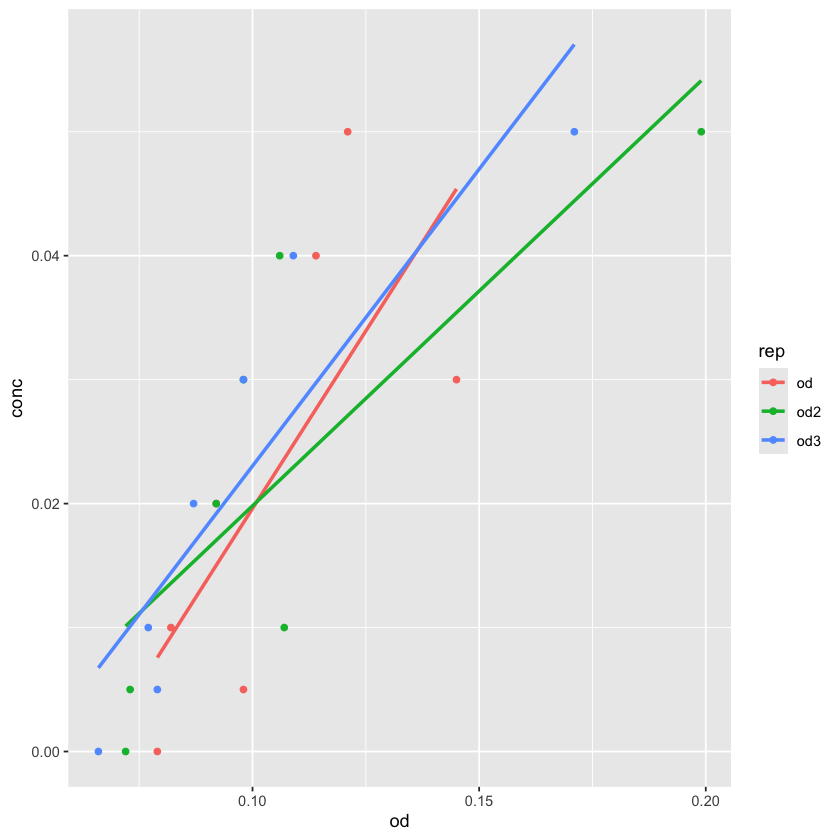

In [612]:
# Plot the data with the regression line
ggplot(low_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


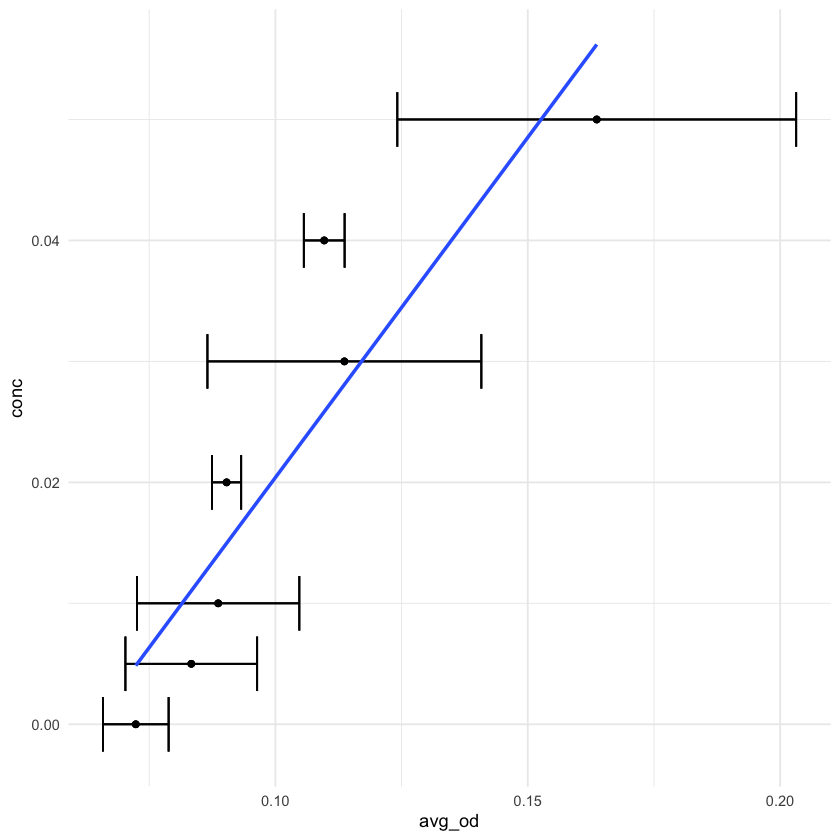

In [613]:
ggplot(low_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### High

In [614]:
# add data 
hi <- data.frame(id = unlist(plate_setup[3, 1:7]),
                    conc = unlist(plate_setup[4, 1:7]),
                    od = unlist(raw['b', 1:7]),
                    od2 = unlist(raw['f', 1:7])
                 )
# convert to numeric
hi$conc<-as.numeric(hi$conc)

# calculate avg, standard deviation  and pivot 
hi$avg_od <- rowMeans(low[, c("od", "od2")])

# pivot
hi_long<-hi %>% pivot_longer(cols = c("od", "od2"),
             names_to = 'rep',
             values_to = 'od')
# std dev
hi_long <- hi_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [615]:
hi_long

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
STDB1,0.00,0.0755,od,0.070,0.00848528
STDB1,0.00,0.0755,od2,0.082,0.00848528
STDB2,0.02,0.0855,od,0.086,0.00494975
STDB2,0.02,0.0855,od2,0.093,0.00494975
STDB3,0.05,0.0945,od,0.112,0.00707107
STDB3,0.05,0.0945,od2,0.122,0.00707107
STDB4,0.10,0.0920,od,0.168,0.00141421
STDB4,0.10,0.0920,od2,0.166,0.00141421
STDB5,0.20,0.1215,od,0.310,0.02687006


#### Standard curve

In [616]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
hi_model <- lm(conc ~ od, data = hi_long)
# view summary stats (R-squared)
summary(hi_model)


Call:
lm(formula = conc ~ od, data = hi_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07052 -0.00127  0.00966  0.01673  0.05477 

Coefficients:
            Estimate Std. Error t value         Pr(>|t|)    
(Intercept)  -0.0898     0.0148   -6.06 0.00005666777797 ***
od            1.0736     0.0324   33.14 0.00000000000036 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.038 on 12 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.988 
F-statistic: 1.1e+03 on 1 and 12 DF,  p-value: 0.000000000000362


In [617]:
## use the averages for the curve 
hi_avg_model <- lm(conc ~ avg_od, data = hi_long)
summary(hi_avg_model)


Call:
lm(formula = conc ~ avg_od, data = hi_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25605 -0.06665 -0.00619  0.08896  0.18034 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   -0.985      0.157   -6.27 0.0000411 ***
avg_od        11.860      1.443    8.22 0.0000029 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.142 on 12 degrees of freedom
Multiple R-squared:  0.849,	Adjusted R-squared:  0.837 
F-statistic: 67.5 on 1 and 12 DF,  p-value: 0.00000285


In [618]:
aic <- AIC(hi_model, hi_avg_model)
aic
# non-average is the better model (lower AIC)

,df,AIC
,<dbl>,<dbl>
hi_model,3,-47.960
hi_avg_model,3,-11.055


`geom_smooth()` using formula = 'y ~ x'


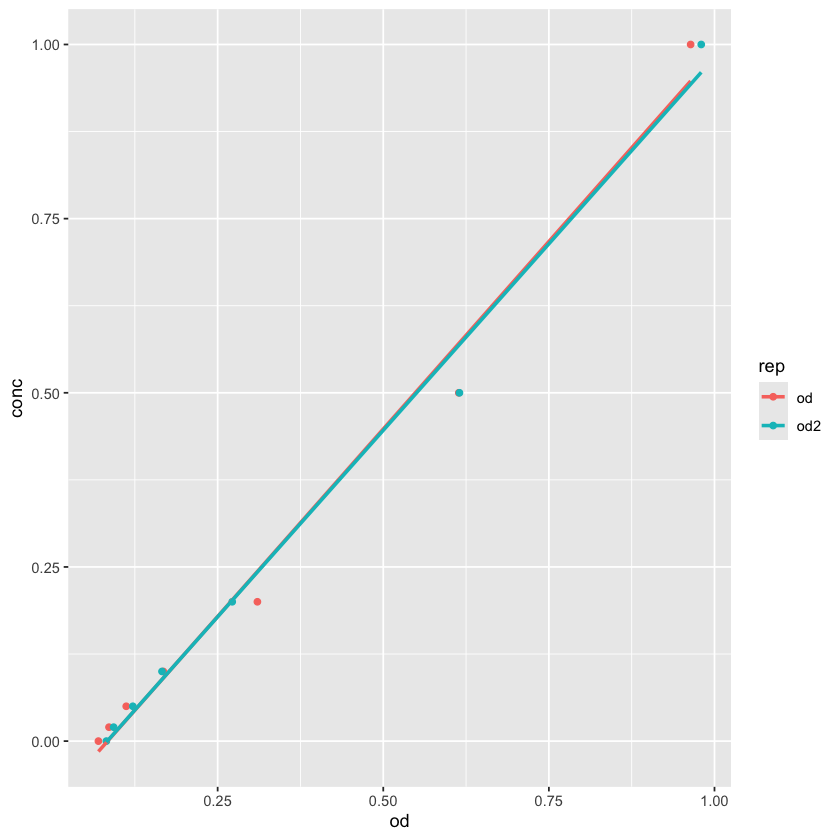

In [619]:
# Plot the data with the regression line
ggplot(hi_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


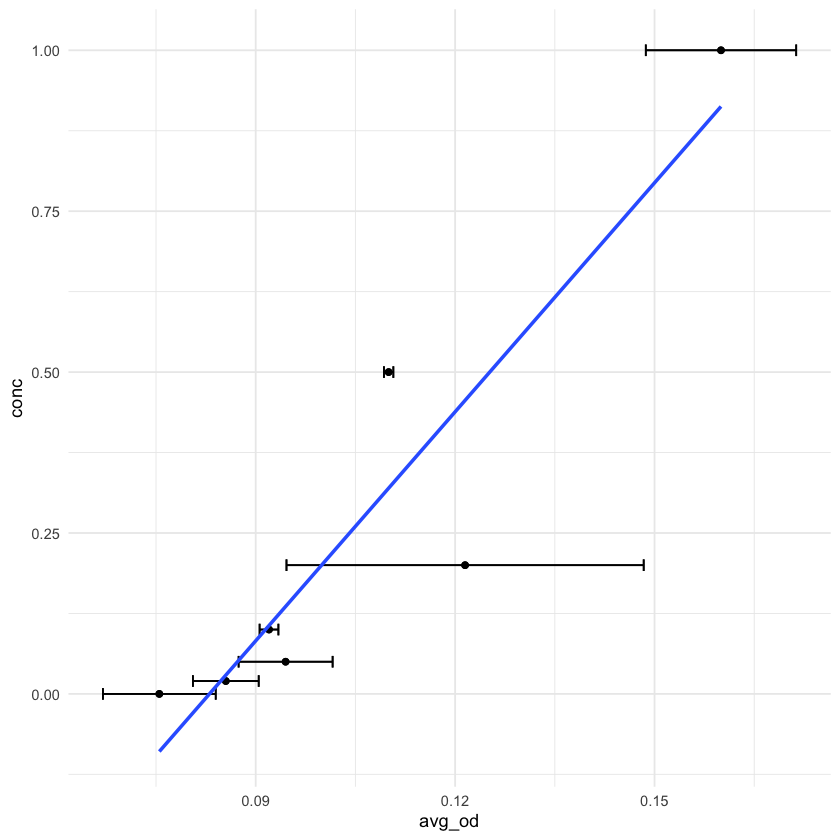

In [620]:
ggplot(hi_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### Combined 

In [621]:
# merge rows 
stnds<-bind_rows(hi_long, low_long)

head(stnds)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
STDB1,0.00,0.0755,od,0.070,0.0084853
STDB1,0.00,0.0755,od2,0.082,0.0084853
STDB2,0.02,0.0855,od,0.086,0.0049497
STDB2,0.02,0.0855,od2,0.093,0.0049497
STDB3,0.05,0.0945,od,0.112,0.0070711
STDB3,0.05,0.0945,od2,0.122,0.0070711


In [622]:
# recalculate averages 
stnds<-stnds %>% 
    group_by(conc) %>% 
        mutate(avg_od = mean(od))

In [623]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switcstndsng variables. since they are a linear relationsstndsp tstndss should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
stnds_model <- lm(conc ~ od, data = stnds)
# view summary stats (R-squared)
summary(stnds_model)


Call:
lm(formula = conc ~ od, data = stnds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07458 -0.00116  0.00932  0.01367  0.06107 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -0.08725    0.00658   -13.3   0.0000000000000089 ***
od           1.06451    0.02185    48.7 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0297 on 33 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.986 
F-statistic: 2.37e+03 on 1 and 33 DF,  p-value: <0.0000000000000002


In [624]:
## use the averages for the curve 
stnds_avg_model <- lm(conc ~ avg_od, data = stnds)
summary(stnds_avg_model)


Call:
lm(formula = conc ~ avg_od, data = stnds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06913 -0.01007  0.00414  0.01097  0.04839 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.08830    0.00526   -16.8 <0.0000000000000002 ***
avg_od       1.06986    0.01751    61.1 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0237 on 33 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.991 
F-statistic: 3.73e+03 on 1 and 33 DF,  p-value: <0.0000000000000002


`geom_smooth()` using formula = 'y ~ x'


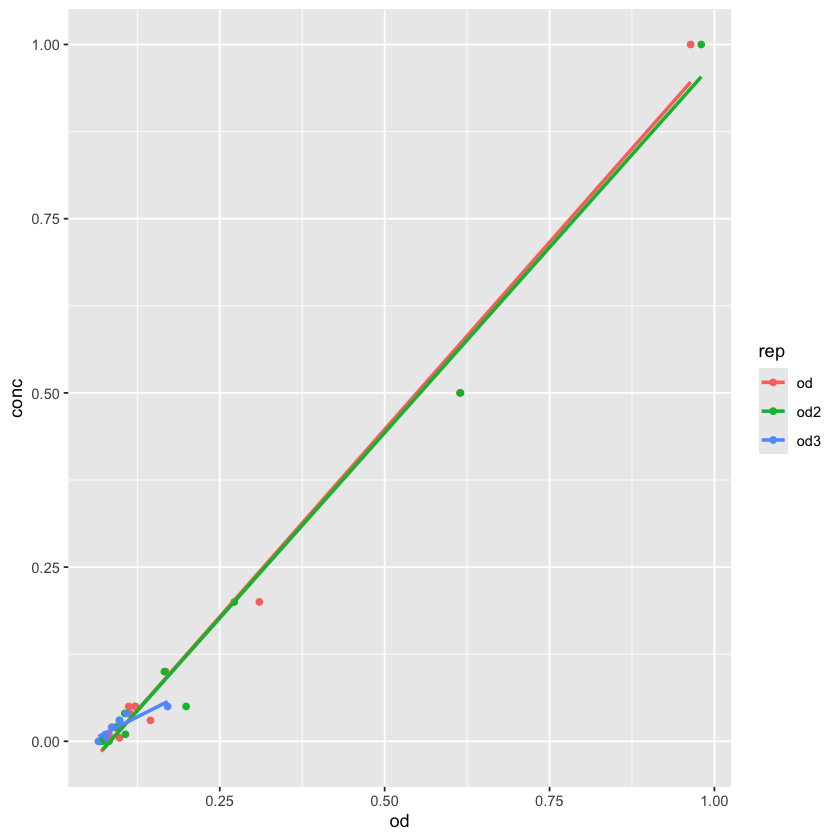

In [625]:
# Plot the data with the regression line
ggplot(stnds, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


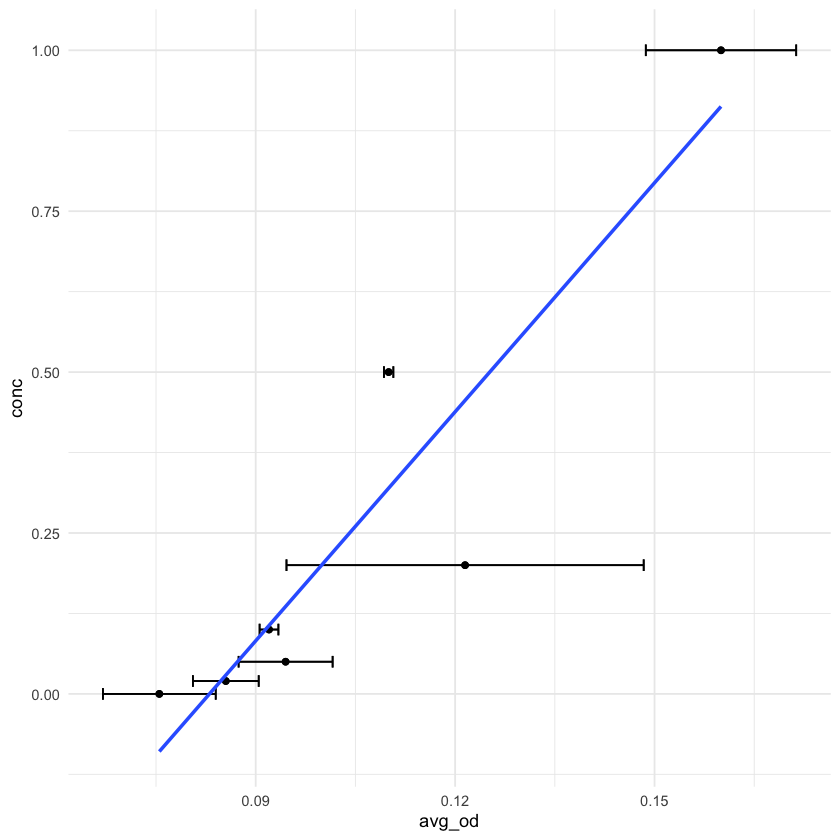

In [626]:
ggplot(hi_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

In [627]:
aic <- AIC(stnds_model, stnds_avg_model, hi_model, hi_avg_model, low_model, low_avg_model)
aic
# non-average is the better model (lower AIC)

Warning message in AIC.default(stnds_model, stnds_avg_model, hi_model, hi_avg_model, :
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
stnds_model,3,-142.980
stnds_avg_model,3,-158.679
hi_model,3,-47.960
hi_avg_model,3,-11.055
low_model,3,-125.427
low_avg_model,3,-142.734


## Samples and QC from curves

### add data 

In [628]:
# pull out sample data (samples, QCs, blanks) and use stnd curve to calculate concentrations

In [629]:
# samples
#S123: C & D 1-3 
#S159: C & D 4-6

s123 <- raw[c("c", "d"),1:3] %>%
    mutate(sample = 's123')
s159 <- raw[c("c", "d"),4:6] %>% 
    mutate(sample = 's159') 
names(s159) <- c(1,2,3,'sample')
samples <- rbind(s123, s159) %>%
    pivot_longer(cols = 1:3,
                names_to = 'rep',
                 values_to = 'od')
samples

sample,rep,od
<chr>,<chr>,<dbl>
s123,1,0.074
s123,2,0.072
s123,3,0.070
s123,1,0.080
s123,2,0.071
s123,3,0.072
s159,1,0.071
s159,2,0.071
s159,3,0.073


In [630]:
# QC1 (1ppm): A,B,E,F 9 & C7 
# QC2 (0.5 ppm): A,B,E,F 10 & D7 
# QC3 (0.05 ppm): A,B,E,F 11 & C8

qc1 <- data.frame(
  rep = c(1, 2, 3, 4, 5), # Replicate numbers
  od = c(raw["a", 9], raw["b", 9], raw["e", 9], raw["f", 9], raw["c", 7]), # Extract specific values
  sample = "qc1"
)

qc2 <- data.frame(
  rep = c(1, 2, 3, 4, 5),
  od = c(raw["a", 10], raw["b", 10], raw["e", 10], raw["f", 10], raw["d", 7]),
  sample = "qc2" 
)

qc3 <- data.frame(
  rep = c(1, 2, 3, 4, 5), 
  od = c(raw["a", 11], raw["b", 11], raw["e", 11], raw["f", 11], raw["c", 8]), 
  sample = "qc3" 
)

# Combine
qc_long <- bind_rows(qc1, qc2, qc3)
qc_long

rep,od,sample
<dbl>,<dbl>,<chr>
1,0.847,qc1
2,0.846,qc1
3,0.848,qc1
4,0.842,qc1
5,0.846,qc1
1,0.474,qc2
2,0.484,qc2
3,0.485,qc2
4,0.486,qc2


In [631]:
#blanks 
# A,B,D, E, F 8
# C 9-11
# D 9-11
blanks <- data.frame(
  rep = c(seq(1:11)), # Replicate numbers
  od = c(raw["a", 8], raw["b", 8],  raw["d", 8], raw["e", 8], raw["f", 8], 
         raw["c", 9], raw["d", 9], raw["c", 10], raw["d", 10], raw["c", 11], raw["d", 11]),
  sample = "blank"
)
blanks  

rep,od,sample
<int>,<dbl>,<chr>
1,0.066,blank
2,0.064,blank
3,0.064,blank
4,0.064,blank
5,0.067,blank
6,0.066,blank
7,0.064,blank
8,0.065,blank
9,0.064,blank


In [632]:
samples<-rbind(samples, qc_long)
samples<-rbind(samples, blanks)

In [633]:
samples <- samples %>%
    group_by(sample) %>%
    mutate(avg_od = mean(od)) %>% # Calculate mean within each group and add it as a new column
    mutate(sd_od = sd(od)) %>%
    ungroup() # Remove grouping for subsequent operations
samples

sample,rep,od,avg_od,sd_od
<chr>,<chr>,<dbl>,<dbl>,<dbl>
s123,1,0.074,0.073167,0.0036009
s123,2,0.072,0.073167,0.0036009
s123,3,0.070,0.073167,0.0036009
s123,1,0.080,0.073167,0.0036009
s123,2,0.071,0.073167,0.0036009
s123,3,0.072,0.073167,0.0036009
s159,1,0.071,0.069333,0.0027325
s159,2,0.071,0.069333,0.0027325
s159,3,0.073,0.069333,0.0027325


### predicted values based on low curve (individual lm model)

In [634]:
# add actual concentrations
samples <- samples %>%
    mutate(actual_conc = (case_when(
        sample == 'qc1' ~ 1,
        sample == 'qc2' ~ 0.5,
        sample == 'qc3' ~ 0.05,
        sample == 'blank' ~ 0,
        TRUE ~ NA))
        )

# calculate concentrations using curve 
samples$predicted_conc <- predict(low_model, newdata = samples)

#calculate avgs and sd of predicted conc
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc = mean(predicted_conc)) %>%
        mutate(sd_predicted_conc = sd(predicted_conc)) %>%
            ungroup()

In [635]:
# calculate % error for qcs (individually, by rep)
# make lists to loop through 
qc_list <- c('qc1','qc2','qc3')
expected_conc <- c(1,0.5,0.05)

# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error  # For non-matching rows, retain NA
    ))
}

### predicted values based on averages from low curve (lm average)

In [636]:
# calculate predictions from stnd curve 
samples$predicted_conc_avglm <- predict(low_avg_model, newdata = samples)

#calculate avgs and sd of predicted conc
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc_avglm = mean(predicted_conc_avglm)) %>%
        mutate(sd_predicted_conc_avglm = sd(predicted_conc_avglm)) %>%
            ungroup()

In [637]:
# calculate % error for qcs (individually, by rep)

# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error_avglm = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error_avglm = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc_avglm - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error_avglm  # For non-matching rows, retain NA
    ))
}

In [638]:
# avg is better bc of lower AIC and lower percent errors, 
# removing predictions based on other model 

In [639]:
# can remove results from individual rep-based low stnd curve 
# keeping to look at margin of errors later 
# samples<-samples %>%
#     select(-c(predicted_conc, avg_predicted_conc, sd_predicted_conc, percent_error))

In [640]:
# margin of error 
# Margin of Error= z * s/sqrt(n)
# z score = 1.96 for 95% confidence
# s = stnd dev
# n = sample size 
# sd<-pull(samples[samples$sample == 'blank' & samples$rep == 1, 'predicted_conc_avglm'][1])
# me_blank <- 1.96 * sd/sqrt(11)
# print(paste('ME of blank:', me_blank))

# sd<-samples %>%
#   filter(sample == 's123' & rep == 1) %>%
#   pull(predicted_conc_avglm) %>%
#   .[1]
# me_s123 <- 1.96* sd/sqrt(6)
# print(paste('ME of me_s123:', me_s123))

# sd<-samples %>%
#   filter(sample == 's159' & rep == 1) %>%
#   pull(predicted_conc_avglm) %>%
#   .[1]
# me_s159 <- 1.96* sd/sqrt(6)
# print(paste('ME of me_s159:', me_s159))

In [641]:
# # blanks + or - margin of error
# print('blanks + or - margin of error:')
# pull(samples[samples$sample == 'blank' & samples$rep == 1, 'avg_predicted_conc_avglm'][1])+me_blank
# pull(samples[samples$sample == 'blank' & samples$rep == 1, 'avg_predicted_conc_avglm'][1])-me_blank

In [642]:
# # s123 + or - me 
# print('s123 + or - margin of error:')
# pull(samples[samples$sample == 's123' & samples$rep == 1, 'avg_predicted_conc_avglm'][1])+me_s123
# pull(samples[samples$sample == 's123' & samples$rep == 1, 'avg_predicted_conc_avglm'][1])-me_s123

In [643]:
# s159 + or - me 
# print('s159 + or - margin of error:')
# pull(samples[samples$sample == 's159' & samples$rep == 1, 'avg_predicted_conc_avglm'][1])+me_s159
# pull(samples[samples$sample == 's159' & samples$rep == 1, 'avg_predicted_conc_avglm'][1])-me_s159

### predicted values based on all stnds together (stnds avg lm model) 

In [644]:
# calculate concentrations using curve 
samples$predicted_conc_stndsavglm <- predict(stnds_avg_model, newdata = samples)

In [645]:
# add avgs and sd
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc_stndsavglm = mean(predicted_conc_stndsavglm)) %>%
        mutate(sd_predicted_conc_stndsavglm = sd(predicted_conc_stndsavglm)) %>%
               ungroup()

In [646]:
# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error_stndsavglm = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error_stndsavglm = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc_stndsavglm - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error_stndsavglm  # For non-matching rows, retain NA
    ))
}

### predicted values based on all stnds together (stnds lm model) 

In [647]:
# calculate concentrations using curve 
samples$predicted_conc_stndslm <- predict(stnds_model, newdata = samples)

In [648]:
# add avgs and sd
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc_stndslm = mean(predicted_conc_stndslm)) %>%
        mutate(sd_predicted_conc_stndslm = sd(predicted_conc_stndslm)) %>%
               ungroup()

In [649]:
# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error_stndslm = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error_stndslm = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(avg_predicted_conc_stndslm - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error_stndslm  # For non-matching rows, retain NA
    ))
}

In [650]:
head(samples)

sample,rep,od,avg_od,sd_od,actual_conc,predicted_conc,avg_predicted_conc,sd_predicted_conc,percent_error,⋯,sd_predicted_conc_avglm,percent_error_avglm,predicted_conc_stndsavglm,avg_predicted_conc_stndsavglm,sd_predicted_conc_stndsavglm,percent_error_stndsavglm,predicted_conc_stndslm,avg_predicted_conc_stndslm,sd_predicted_conc_stndslm,percent_error_stndslm
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s123,1,0.074,0.073167,0.0036009,NA,0.0099040,0.0095535,0.0015147,NA,⋯,0,NA,-0.010018,-0.010018,0,NA,-0.0084801,-0.0093672,0.0038332,NA
s123,2,0.072,0.073167,0.0036009,NA,0.0090627,0.0095535,0.0015147,NA,⋯,0,NA,-0.010018,-0.010018,0,NA,-0.0106092,-0.0093672,0.0038332,NA
s123,3,0.070,0.073167,0.0036009,NA,0.0082214,0.0095535,0.0015147,NA,⋯,0,NA,-0.010018,-0.010018,0,NA,-0.0127382,-0.0093672,0.0038332,NA
s123,1,0.080,0.073167,0.0036009,NA,0.0124279,0.0095535,0.0015147,NA,⋯,0,NA,-0.010018,-0.010018,0,NA,-0.0020931,-0.0093672,0.0038332,NA
s123,2,0.071,0.073167,0.0036009,NA,0.0086421,0.0095535,0.0015147,NA,⋯,0,NA,-0.010018,-0.010018,0,NA,-0.0116737,-0.0093672,0.0038332,NA
s123,3,0.072,0.073167,0.0036009,NA,0.0090627,0.0095535,0.0015147,NA,⋯,0,NA,-0.010018,-0.010018,0,NA,-0.0106092,-0.0093672,0.0038332,NA


In [651]:
# renumber sample reps:
samples <- samples %>%
  group_by(sample) %>%
  mutate(
    rep = row_number()
  ) %>%
  ungroup()

In [652]:
predictions_summary<-samples %>%
    group_by(sample) %>%
    slice(1) %>% #take first row of each sample since predictions are based on avgs not individual reps 
        select(sample,avg_od, sd_od, actual_conc, 
               predicted_conc_avglm, percent_error_avglm, 
               avg_predicted_conc_stndsavglm, percent_error_stndsavglm,
               avg_predicted_conc_stndslm, percent_error_stndslm)

In [653]:
predictions_summary
# avg lm = low standard curve (based on averages)
# stnds avg lm = standard curve using BOTH low and high standards (based on avgs)
# stnds lm = standard curve using BOTH low and high standards (model based on indiviudal values, as you can see it does not differ much by the avg one)

sample,avg_od,sd_od,actual_conc,predicted_conc_avglm,percent_error_avglm,avg_predicted_conc_stndsavglm,percent_error_stndsavglm,avg_predicted_conc_stndslm,percent_error_stndslm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
blank,0.064727,0.0011037,0.00,0.00057025,NA,-0.019047,NA,-0.0183510,NA
qc1,0.845800,0.0022804,1.00,0.43973287,56.027,0.816590,18.341,0.8131073,18.689
qc2,0.481400,0.0051769,0.50,0.23484688,53.031,0.426734,14.653,0.4252005,14.960
qc3,0.120400,0.0027928,0.05,0.03187256,36.255,0.040515,18.970,0.0409130,18.174
s123,0.073167,0.0036009,NA,0.00531535,NA,-0.010018,NA,-0.0093672,NA
s159,0.069333,0.0027325,NA,0.00316003,NA,-0.014119,NA,-0.0134479,NA


In [654]:
# Standard Curve with all stnds seems to be the best option..
    # lowest percent errors for qcs are from standard curve using both sets of standards (stndsavglm and stndslm)
    # HOWEVER blanks and samples now turn out to be negative 
        # samples are outside of blanks' margin of error though 

# using the low standard curve (avglm),
    # samples are low but not negative 
        # only 1 sample is outside of the blanks' margin of error 
    # % erorr for qcs are very high 


#### Margin of errors 

In [687]:
calculate_me <- function(samples, sample_name, rep_num = 1, n_sample, n_blank =11, model_sd, model_avg) {
  "
  Calculates margin of error and subtracts the average predicted value from the blank sample.

  Args:
    samples: The data frame containing the sample data.
    sample_name: The name of the sample.
    rep_num: The replicate number.
    n: The sample size.
    model: The column name for standard deviation calculation.

  Returns:
    The margin of error minus the average predicted value from the blank sample.
  "

  # Calculate the margin of error
  sd_sample <- samples %>%
    filter(sample == sample_name & rep == rep_num) %>%
    pull(model_sd) %>%
    .[1]
  me_sample <- 1.96 * sd / sqrt(n_sample)

    # Calculate margin of error for the blank
  sd_blank <- samples %>%
    filter(sample == "blank") %>%
    pull(model_sd) %>%
    .[1]
  me_blank <- 1.96 * sd_blank / sqrt(n_blank)

    print(paste("sample me:", me_sample))
    print(paste("blank me:", me_blank)) 

  # see if samples and blanks overlap with me considered 
    avg_sample <- samples %>%
    filter(sample == sample_name) %>%
    pull(model_avg) %>%
    .[1]
    print(avg_sample)
         
    avg_blank <- samples %>%
    filter(sample == "blank") %>%
    pull(model_avg) %>%
    .[1]
    print(avg_blank)
    
  # subtract me from blank to get lowest possibility for blank
    low_blank <- avg_blank - me_blank
    (print(paste("lowest blank value (-me):", low_blank)))
  # subtract me from sample to get lowest possibility for sample
    low_s <- avg_sample - me_sample
    (print(paste("lowest sample value (-me):", low_s)))
  # subtract from each other to see if they overlap 
    diff <- low_s - low_blank
    if (diff > 0) {
    print(paste(diff, 'sample is outside of blank margin of error'))
  } else {
    print(paste(diff, 'sample is NOT outside of blank margin of error'))
  }

  return(diff)
}


In [689]:
# low curve (individual lm) 
calculate_me(samples, "s123", rep_num = 1, n_sample = 6, 11, "sd_predicted_conc","avg_predicted_conc")
calculate_me(samples, "s159", rep_num = 1, n_sample = 6, 11, "sd_predicted_conc","avg_predicted_conc")

[1] "sample me: 0.00252855260303206"
[1] "blank me: 0.000274368156290383"
[1] 0.0095535
[1] 0.0060035
[1] "lowest blank value (-me): 0.00572911486614639"
[1] "lowest sample value (-me): 0.00702493717194443"
[1] "0.00129582230579804 sample is outside of blank margin of error"


7 
0.0012958

[1] "sample me: 0.00252855260303206"
[1] "blank me: 0.000274368156290383"
[1] 0.007941
[1] 0.0060035
[1] "lowest blank value (-me): 0.00572911486614639"
[1] "lowest sample value (-me): 0.00541245654646409"
[1] "-0.000316658319682301 sample is NOT outside of blank margin of error"


7 
-0.00031666

In [692]:
# all stnds together (individual lm)
calculate_me(samples, "s123", rep_num = 1, n_sample = 6, 11, "sd_predicted_conc_stndslm","avg_predicted_conc_stndslm")
calculate_me(samples, "s159", rep_num = 1, n_sample = 6, 11, "sd_predicted_conc_stndslm","avg_predicted_conc_stndslm")

[1] "sample me: 0.00252855260303206"
[1] "blank me: 0.000694328192703275"
[1] -0.0093672
[1] -0.018351
[1] "lowest blank value (-me): -0.019045371386761"
[1] "lowest sample value (-me): -0.0118957916781943"
[1] "0.00714957970856677 sample is outside of blank margin of error"


7 
0.0071496

[1] "sample me: 0.00252855260303206"
[1] "blank me: 0.000694328192703275"
[1] -0.013448
[1] -0.018351
[1] "lowest blank value (-me): -0.019045371386761"
[1] "lowest sample value (-me): -0.0159764064754664"
[1] "0.00306896491129464 sample is outside of blank margin of error"


7 
0.003069